<a href="https://colab.research.google.com/github/brenaSF/LH_CD_BrenaFreitas/blob/main/LH_CD_BrenaFreitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - Indicium Precificação EDA
Objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.

## Importação de bibliotecas

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib

In [50]:
import warnings
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint


In [51]:
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sn.__version__)

2.0.3
1.25.2
3.7.1
0.13.1


## Pré-processamento



In [146]:
data = pd.read_csv("teste_indicium_precificacao.csv")

In [147]:
data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


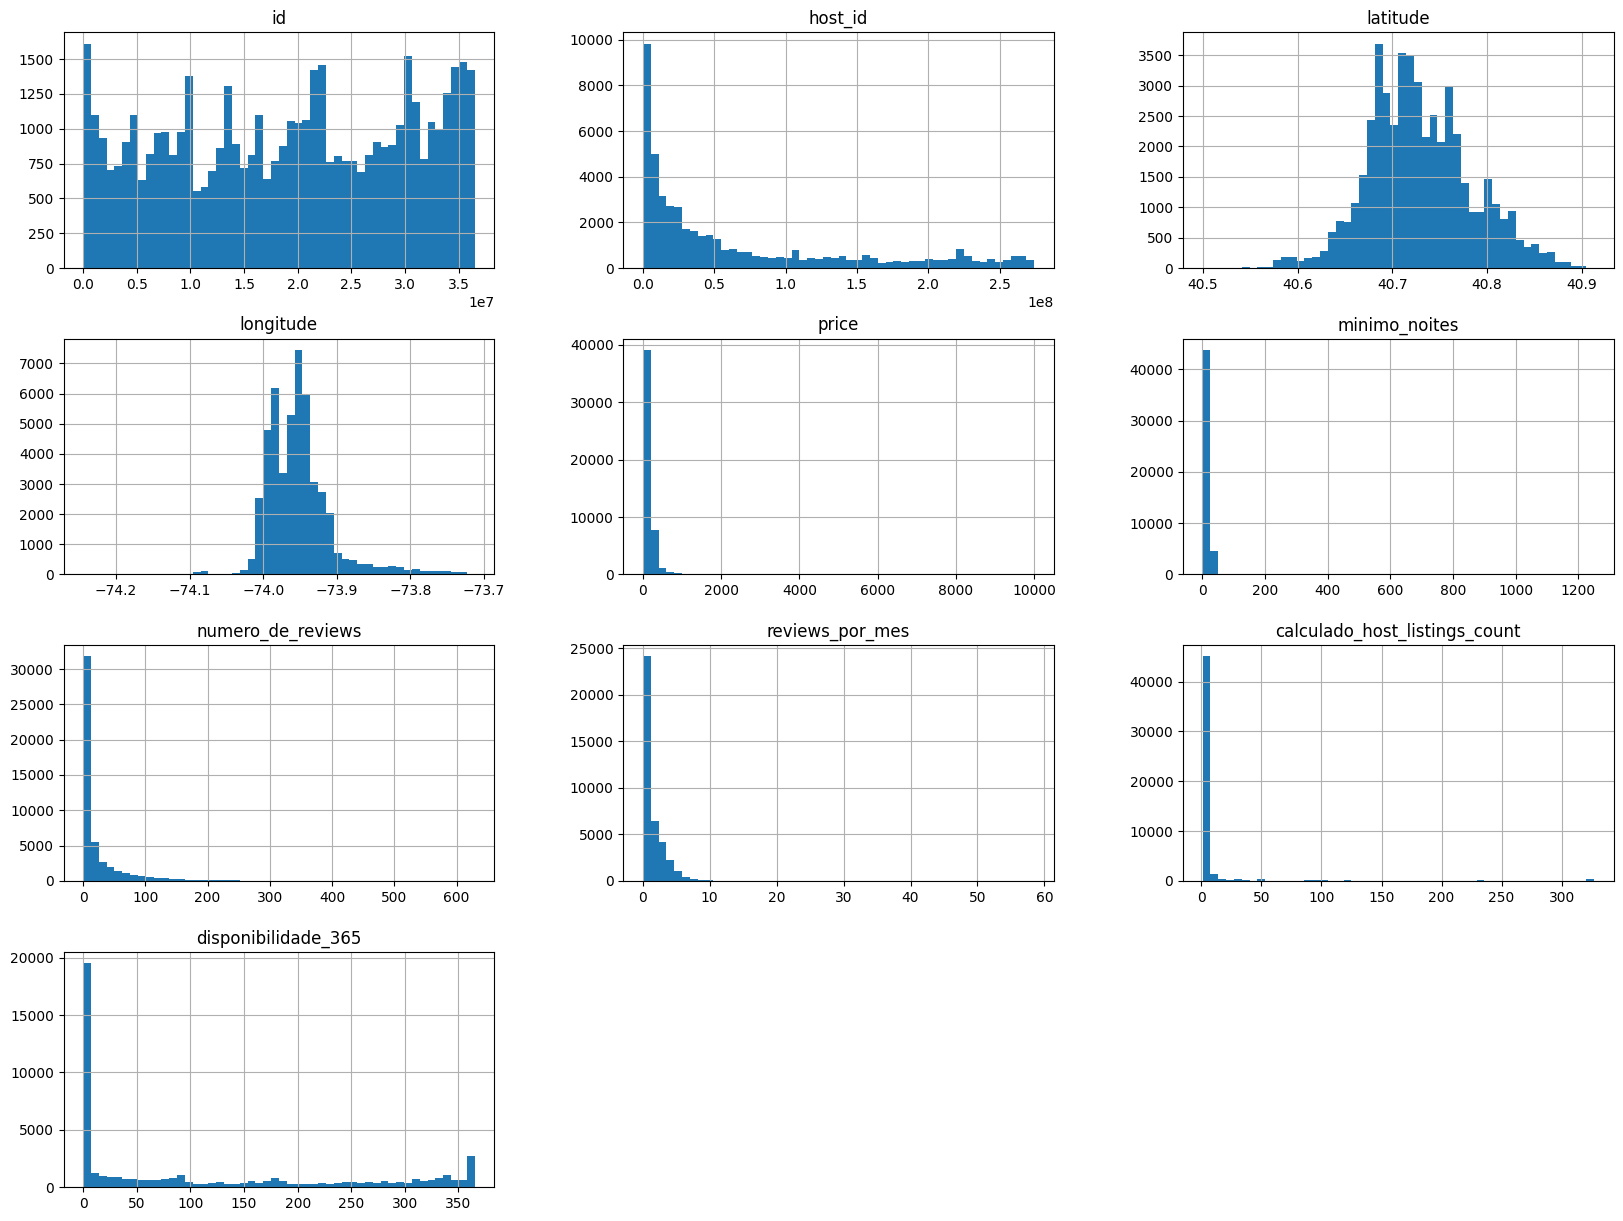

In [148]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [149]:
data.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64

In [150]:
data.bairro_group.value_counts()

bairro_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [151]:
data.count()

id                               48894
nome                             48878
host_id                          48894
host_name                        48873
bairro_group                     48894
bairro                           48894
latitude                         48894
longitude                        48894
room_type                        48894
price                            48894
minimo_noites                    48894
numero_de_reviews                48894
ultima_review                    38842
reviews_por_mes                  38842
calculado_host_listings_count    48894
disponibilidade_365              48894
dtype: int64

In [152]:
data.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

### visualização das variáveis categóricas e numéricas

In [154]:
# Frequência da ocorrência dos nomes dos diferentes locais para aluguel
frequencia_nome_local = data['nome'].value_counts()

frequencia_nome_local



nome
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Modern Oasis in Central Park Slope                     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47904, dtype: int64

In [155]:
frequencia_nome_local = data['nome'].value_counts()

frequencia_nome_local

nome
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Modern Oasis in Central Park Slope                     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47904, dtype: int64

In [156]:
valor = len(data['nome'])

print(valor)

total_nomes_unicos = len(frequencia_nome_local)

print("Nomes de locais únicos :",total_nomes_unicos )

48894
Nomes de locais únicos : 47904


In [157]:
minimo = data['minimo_noites'] >= 400

In [158]:
minimo

0        False
1        False
2        False
3        False
4        False
         ...  
48889    False
48890    False
48891    False
48892    False
48893    False
Name: minimo_noites, Length: 48894, dtype: bool

### dados faltantes/duplos

In [159]:
valores_faltantes = data.isna().sum()
valores_faltantes

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [160]:
 data.drop(['id', 'host_name','host_id'], axis=1, inplace=True)

In [161]:
data = data.rename(columns={'bairro_group': 'bairro_grupo', 'room_type': 'tipo_quarto', 'price': 'preco', 'numero_de_reviews': 'numero_avaliacoes','ultima_review':'ultima_review','reviews_por_mes':'reviews_por_mes','calculado_host_listings_count':'contagem_listas_hosts'})

In [162]:
data['ultima_review'] = pd.to_datetime(data['ultima_review'])

# Ordenar as datas
data_sorted = data.sort_values('ultima_review')

# Calcular a mediana das datas
median_date = data_sorted['ultima_review'].median()

print("Mediana das datas:", median_date)

Mediana das datas: 2019-05-19 00:00:00


In [163]:
data['ultima_review'].fillna(median_date, inplace=True)

In [164]:
data.head()

,nome,bairro_grupo,bairro,latitude,longitude,tipo_quarto,preco,minimo_noites,numero_avaliacoes,ultima_review,reviews_por_mes,contagem_listas_hosts,disponibilidade_365
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-19,NaN,1,365
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [165]:
# Retirar valores nulos

data = data.drop(columns=['ultima_review'])
data = data.drop(columns=['reviews_por_mes'])

In [166]:
data = data.dropna()
valores_faltantes_data = data.isna().sum()
valores_faltantes_data

nome                     0
bairro_grupo             0
bairro                   0
latitude                 0
longitude                0
tipo_quarto              0
preco                    0
minimo_noites            0
numero_avaliacoes        0
contagem_listas_hosts    0
disponibilidade_365      0
dtype: int64

In [167]:
#Verificar se há duplicatas

duplicatas = data.duplicated()

print(data[duplicatas])


Empty DataFrame
Columns: [nome, bairro_grupo, bairro, latitude, longitude, tipo_quarto, preco, minimo_noites, numero_avaliacoes, contagem_listas_hosts, disponibilidade_365]
Index: []


In [168]:
valores_ausentes = data.isnull().sum()
valores_ausentes

nome                     0
bairro_grupo             0
bairro                   0
latitude                 0
longitude                0
tipo_quarto              0
preco                    0
minimo_noites            0
numero_avaliacoes        0
contagem_listas_hosts    0
disponibilidade_365      0
dtype: int64

### preço nulo

In [169]:
indice_preco_minimo = data['preco'].idxmin()
print("Índice onde o preço é minimo:", indice_preco_minimo)

menor_preco = data['preco'].min()

posicoes_preco_minimo = data.loc[data['preco'] == menor_preco].index
print("Posições com preço mínimo:", posicoes_preco_minimo)

Índice onde o preço é minimo: 23160
Posições com preço mínimo: Index([23160, 25432, 25633, 25752, 25777, 25793, 25794, 25795, 26258, 26840,
       26865],
      dtype='int64')


In [170]:
data = data[data['preco'] != 0]

In [171]:
menor_preco = data['preco'].min()

print("menor preço:",menor_preco)

menor preço: 10


In [172]:
data = data.dropna(subset=['preco'])
linhas_preco_faltante = data[data['preco'].isnull()]

print("Linhas onde o preço é faltante:")
print(linhas_preco_faltante)

valores_ausentes2 = data.isnull().sum()
valores_ausentes2

Linhas onde o preço é faltante:
Empty DataFrame
Columns: [nome, bairro_grupo, bairro, latitude, longitude, tipo_quarto, preco, minimo_noites, numero_avaliacoes, contagem_listas_hosts, disponibilidade_365]
Index: []


nome                     0
bairro_grupo             0
bairro                   0
latitude                 0
longitude                0
tipo_quarto              0
preco                    0
minimo_noites            0
numero_avaliacoes        0
contagem_listas_hosts    0
disponibilidade_365      0
dtype: int64

In [173]:
data.count()

nome                     48867
bairro_grupo             48867
bairro                   48867
latitude                 48867
longitude                48867
tipo_quarto              48867
preco                    48867
minimo_noites            48867
numero_avaliacoes        48867
contagem_listas_hosts    48867
disponibilidade_365      48867
dtype: int64

## Análise Exploratória

### análise estatística

In [174]:
 data.describe()


,latitude,longitude,preco,minimo_noites,numero_avaliacoes,contagem_listas_hosts,disponibilidade_365
count,48867.00000,48867.000000,48867.000000,48867.000000,48867.000000,48867.000000,48867.000000
mean,40.72895,-73.952174,152.756809,7.011071,23.279023,7.146561,112.782000
std,0.05453,0.046162,240.205362,20.017790,44.557308,32.961743,131.614706
min,40.49979,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000
25%,40.69009,-73.983075,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.72309,-73.955690,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.76312,-73.936295,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.91306,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


### histograma

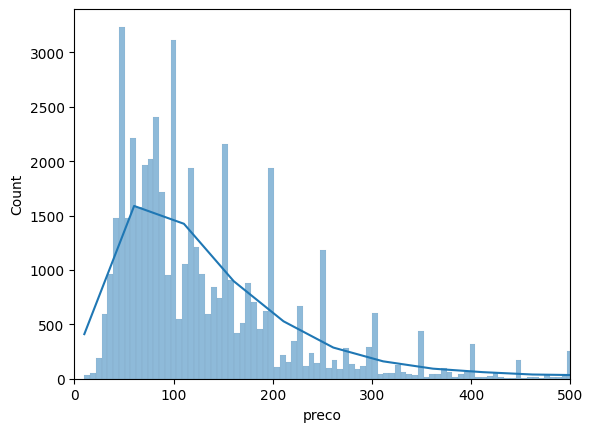

In [175]:
# Histograma do preço
import seaborn as sns

xlim = (0, 500)

# Plote o histograma com os limites ajustados
sns.histplot(data=data, x="preco", kde=True)
plt.xlim(xlim)
plt.show()


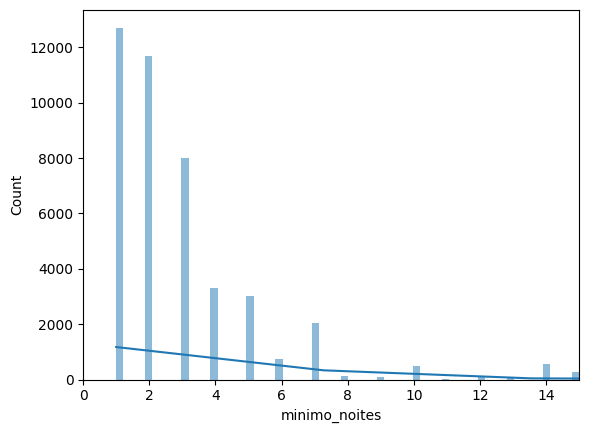

In [176]:
# Histograma do dias minimos para reservar
import seaborn as sns

xlim = (0, 15)

sns.histplot(data=data, x="minimo_noites", kde=True)
plt.xlim(xlim)
plt.show()


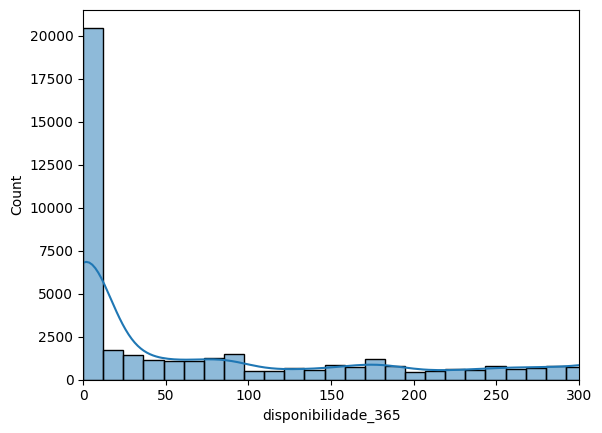

In [177]:
# Histograma do disponibilidade
import seaborn as sns

xlim = (0, 300)

sns.histplot(data=data, x="disponibilidade_365", kde=True)
plt.xlim(xlim)
plt.show()


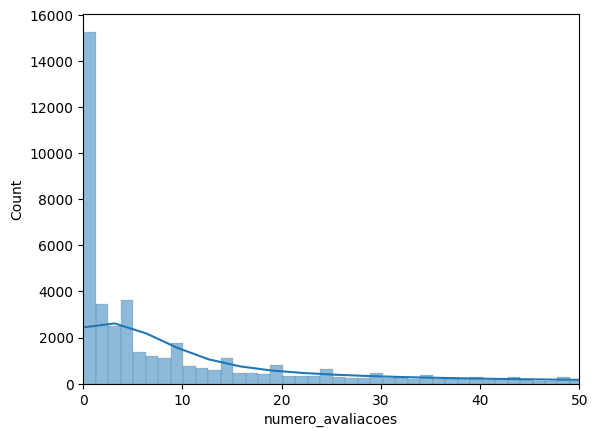

In [178]:
# Histograma
import seaborn as sns

xlim = (0, 50)

sns.histplot(data=data, x="numero_avaliacoes", kde=True)
plt.xlim(xlim)
plt.show()


### Correlação entre variáveis

In [179]:
# Análise de correlação
correlacao_minimo_noites = data['minimo_noites'].corr(data['preco'])

print("Correlação entre número mínimo de noites e preço:", correlacao_minimo_noites)


Correlação entre número mínimo de noites e preço: 0.04281629550532414


In [180]:
correlacao_disponibilidade = data['disponibilidade_365'].corr(data['preco'])

print("Correlação entre disponibilidade ao longo do ano e preço:", correlacao_disponibilidade)

Correlação entre disponibilidade ao longo do ano e preço: 0.0818275334571489


In [145]:
correlacao = data.corr()

ValueError: could not convert string to float: 'Skylit Midtown Castle'

In [101]:
correlacao

,latitude,longitude,preco,minimo_noites,numero_avaliacoes,contagem_listas_hosts,disponibilidade_365
latitude,1.000000,0.084788,0.033900,0.025842,-0.015327,0.019531,-0.010876
longitude,0.084788,1.000000,-0.149912,-0.062928,0.059017,-0.114732,0.082694
preco,0.033900,-0.149912,1.000000,0.042816,-0.047935,0.057461,0.081828
minimo_noites,0.025842,-0.062928,0.042816,1.000000,-0.081579,0.131322,0.145979
numero_avaliacoes,-0.015327,0.059017,-0.047935,-0.081579,1.000000,-0.072415,0.171990
contagem_listas_hosts,0.019531,-0.114732,0.057461,0.131322,-0.072415,1.000000,0.225767
disponibilidade_365,-0.010876,0.082694,0.081828,0.145979,0.171990,0.225767,1.000000


<Axes: >

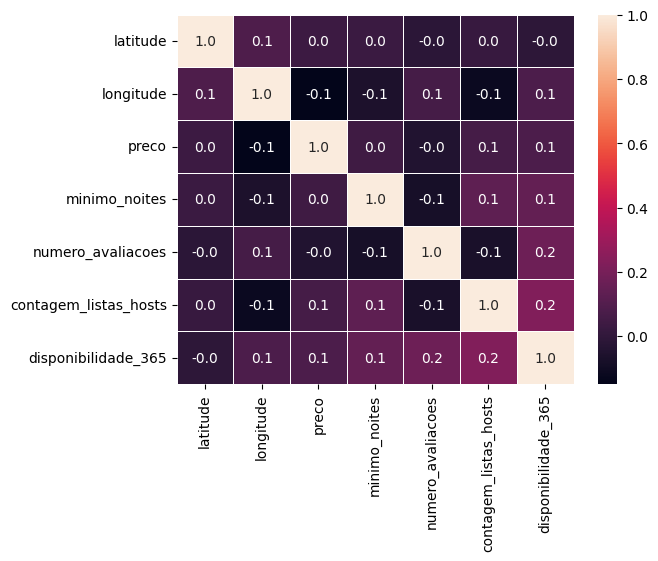

In [102]:
plot = sn.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

Ao observar a matriz de correlação entre as variáveis do conjunto de dados, não se pode identificar um relação linear entre as variáveis, portanto, possuem correlação baixa.

### visualização dos dados

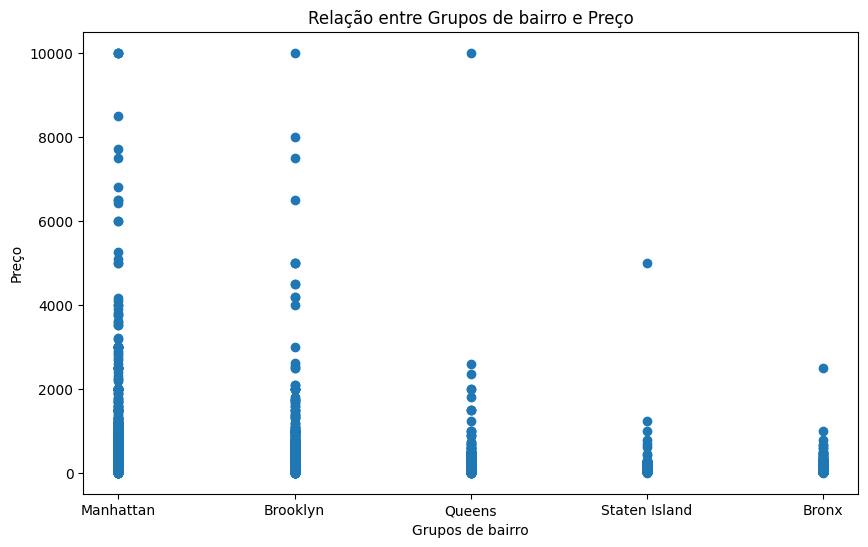

In [182]:
plt.figure(figsize=(10, 6))
plt.scatter(data['bairro_grupo'], data['preco'])
plt.xlabel('Grupos de bairro')
plt.ylabel('Preço')
plt.title('Relação entre Grupos de bairro e Preço')
plt.show()


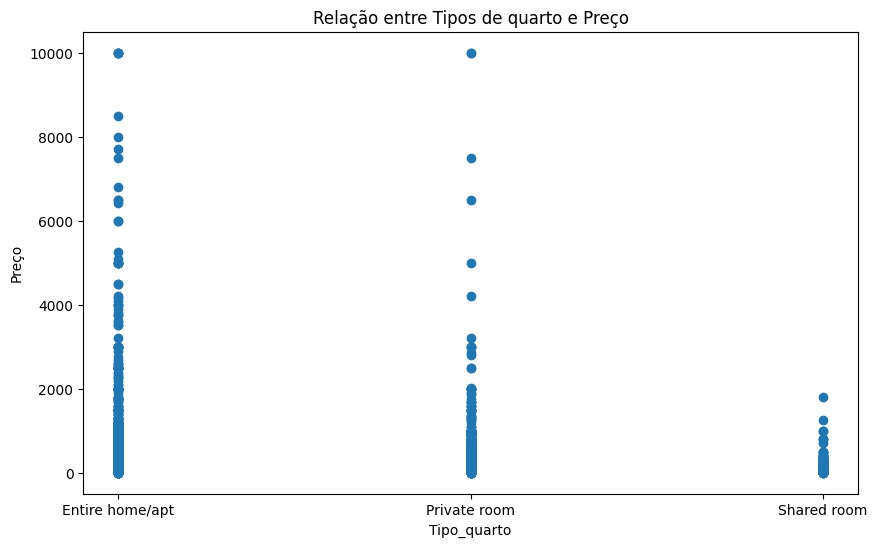

In [183]:
plt.figure(figsize=(10, 6))
plt.scatter(data['tipo_quarto'], data['preco'])
plt.xlabel('Tipo_quarto')
plt.ylabel('Preço')
plt.title('Relação entre Tipos de quarto e Preço')
plt.show()

In [184]:
private_room = data[data['tipo_quarto'] == 'Private room'].groupby('bairro_grupo')['tipo_quarto'].count()

# Encontrar o grupo de bairro com a maior contagem de quartos privados
bairro = private_room.idxmax()
maior_concentracao_p = private_room.max()

print(f'O grupo de bairro com a maior concentração de quartos privados é "{bairro}", com {maior_concentracao_p} quartos privados.')


O grupo de bairro com a maior concentração de quartos privados é "Brooklyn", com 10120 quartos privados.


In [185]:
shared_room = data[data['tipo_quarto'] == 'Shared room'].groupby('bairro_grupo')['tipo_quarto'].count()

# Encontrar o grupo de bairro com a maior contagem de quartos privados
bairro_shared_room = shared_room.idxmax()
maior_concentracao_s = shared_room.max()

print(f'O grupo de bairro com a maior concentração de quartos compartilhados é "{bairro_shared_room}", com {maior_concentracao_s} quartos compartilhados.')


O grupo de bairro com a maior concentração de quartos compartilhados é "Manhattan", com 480 quartos compartilhados.


In [186]:
entire_home =data[data['tipo_quarto'] == 'Entire home/apt'].groupby('bairro_grupo')['tipo_quarto'].count()

bairro_entire_home = entire_home.idxmax()
maior_concentracao_e = entire_home.max()

print(f'O grupo de bairro com a maior concentração de lugares do tipo entire_home/apt é "{bairro_entire_home}", com {maior_concentracao_e} entire home')

O grupo de bairro com a maior concentração de lugares do tipo entire_home/apt é "Manhattan", com 13192 entire home


### boxplot

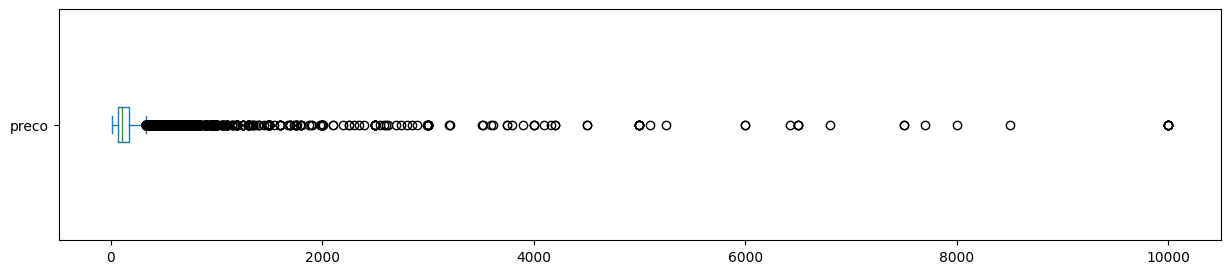

Há 298 lugares com preços maiores que 1000.
Há 48628 lugares com preços menores ou igual a 1000.


In [187]:
# Construção do Boxplot para variável preço.
data['preco'].plot(kind='box', vert=False, figsize=(15, 3))

plt.show()

preco_max= len(data.query('preco >= 1000'))
print(f"Há {preco_max} lugares com preços maiores que 1000.")

preco_min = len(data.query('preco <= 1000'))
print(f"Há {preco_min} lugares com preços menores ou igual a 1000.")



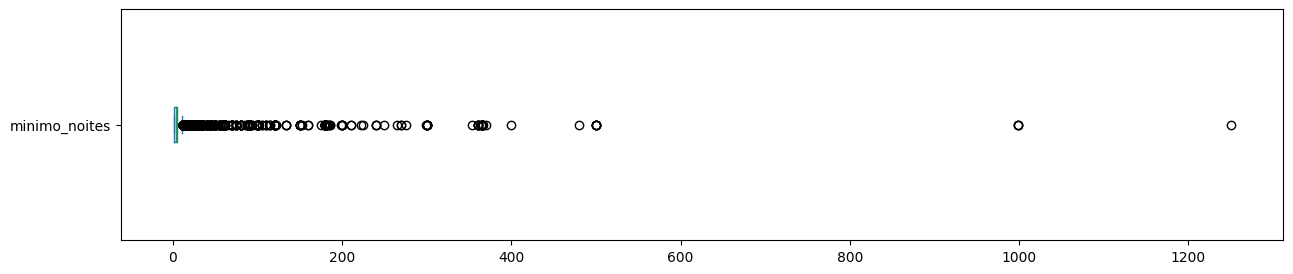

Há 48694 lugares com  100 dias ou menos para reservar.
Há 188 lugares com 100 dias ou mais para reservar.


In [188]:
data['minimo_noites'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

min_noites = len(data.query('minimo_noites <= 100'))
print(f"Há {min_noites} lugares com  100 dias ou menos para reservar.")

max_noites = len(data.query('minimo_noites >= 100'))
print(f"Há {max_noites} lugares com 100 dias ou mais para reservar.")

### Criação de novo dataframe

In [189]:
novo_data = data.copy()
novo_data.drop(novo_data[novo_data.preco >= 1000].index, axis=0, inplace=True)
novo_data.drop(novo_data[novo_data.minimo_noites >= 100].index, axis=0, inplace=True)
novo_data.corr()

ValueError: could not convert string to float: 'Skylit Midtown Castle'

In [ ]:
data.corr()

<ipython-input-45-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,latitude,longitude,preco,minimo_noites,numero_avaliacoes,contagem_listas_hosts,disponibilidade_365
latitude,1.000000,0.084788,0.033900,0.025842,-0.015327,0.019531,-0.010876
longitude,0.084788,1.000000,-0.149912,-0.062928,0.059017,-0.114732,0.082694
preco,0.033900,-0.149912,1.000000,0.042816,-0.047935,0.057461,0.081828
minimo_noites,0.025842,-0.062928,0.042816,1.000000,-0.081579,0.131322,0.145979
numero_avaliacoes,-0.015327,0.059017,-0.047935,-0.081579,1.000000,-0.072415,0.171990
contagem_listas_hosts,0.019531,-0.114732,0.057461,0.131322,-0.072415,1.000000,0.225767
disponibilidade_365,-0.010876,0.082694,0.081828,0.145979,0.171990,0.225767,1.000000


In [190]:

 data.describe()

,latitude,longitude,preco,minimo_noites,numero_avaliacoes,contagem_listas_hosts,disponibilidade_365
count,48867.00000,48867.000000,48867.000000,48867.000000,48867.000000,48867.000000,48867.000000
mean,40.72895,-73.952174,152.756809,7.011071,23.279023,7.146561,112.782000
std,0.05453,0.046162,240.205362,20.017790,44.557308,32.961743,131.614706
min,40.49979,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000
25%,40.69009,-73.983075,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.72309,-73.955690,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.76312,-73.936295,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.91306,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


Ao realizar o tratamento dos dados, em que retirou-se os outliers das variáveis "preço" e "minimo_noites", houve um crescimento na correlação das variáveis, no entanto, a correlação ainda é considerada baixa.

## Responda também às seguintes perguntas:

a. Supondo que uma pessoa esteja pensando em investir em um
apartamento para alugar na plataforma, onde seria mais indicada a
compra?

b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

c. Existe algum padrão no texto do nome do local para lugares de mais
alto valor?


**Onde seria mais indicada a compra ?**   


In [191]:
quantidade_bairros_unicos = novo_data['bairro'].nunique()

quantidade_bairros_unicos


221

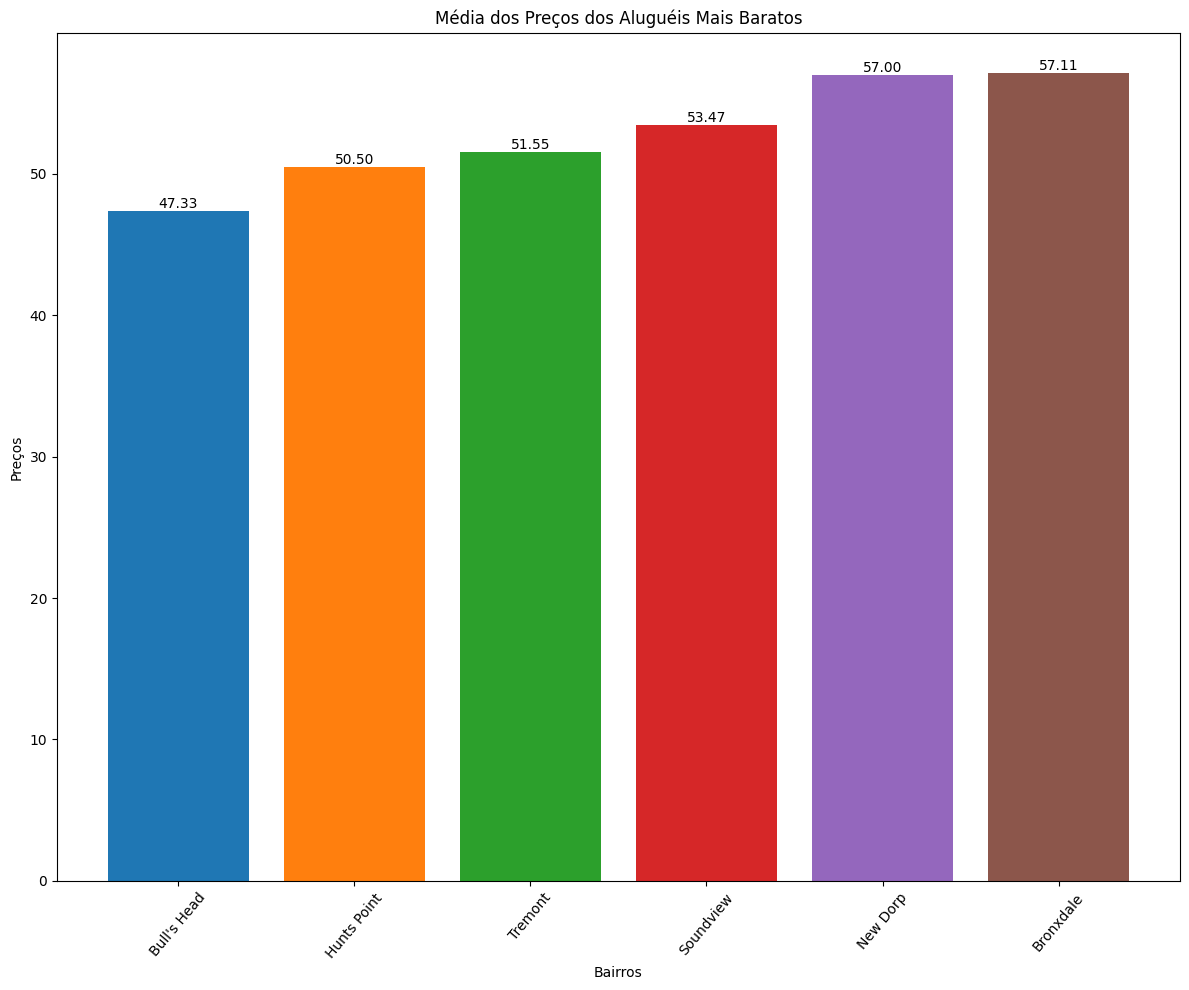

In [192]:
import matplotlib.pyplot as plt

media_bairros_baratos = novo_data.groupby('bairro')['preco'].mean().nsmallest(6)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, ax = plt.subplots(figsize=(12, 10))

ax.bar(media_bairros_baratos.index, media_bairros_baratos.values, color=colors)
ax.set_xlabel('Bairros')
ax.set_ylabel('Preços')
ax.set_title('Média dos Preços dos Aluguéis Mais Baratos')

for i, preco in enumerate(media_bairros_baratos.values):
    ax.annotate(f'{preco:.2f}', (i, preco), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=50)
plt.tight_layout()
plt.show()



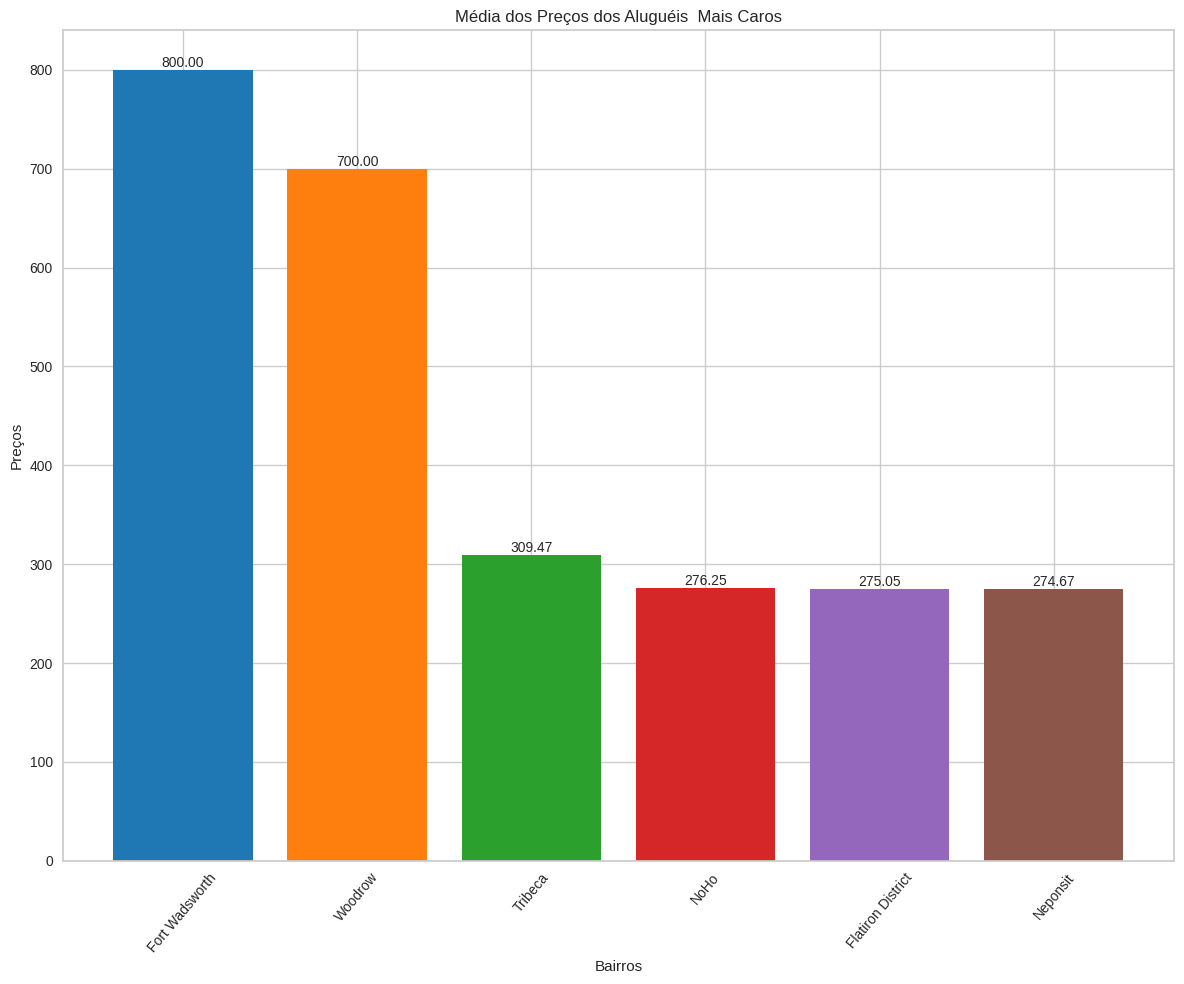

In [ ]:

media_bairros_caros = novo_data.groupby('bairro')['preco'].mean().nlargest(6)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, ax = plt.subplots(figsize=(12, 10))

ax.bar(media_bairros_caros.index, media_bairros_caros.values, color=colors)
ax.set_xlabel('Bairros')
ax.set_ylabel('Preços')
ax.set_title('Média dos Preços dos Aluguéis  Mais Caros')

for i, preco in enumerate(media_bairros_caros.values):
    ax.annotate(f'{preco:.2f}', (i, preco), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [ ]:
media_bairros_caros = novo_data.groupby('bairro')['preco'].mean().nlargest(5)

# Calcular a média dos aluguéis nos 5 bairros mais caros
media_alugueis_caros = media_bairros_caros.mean()

media_alugueis_caros

472.1536269651401

**NY- distritos**

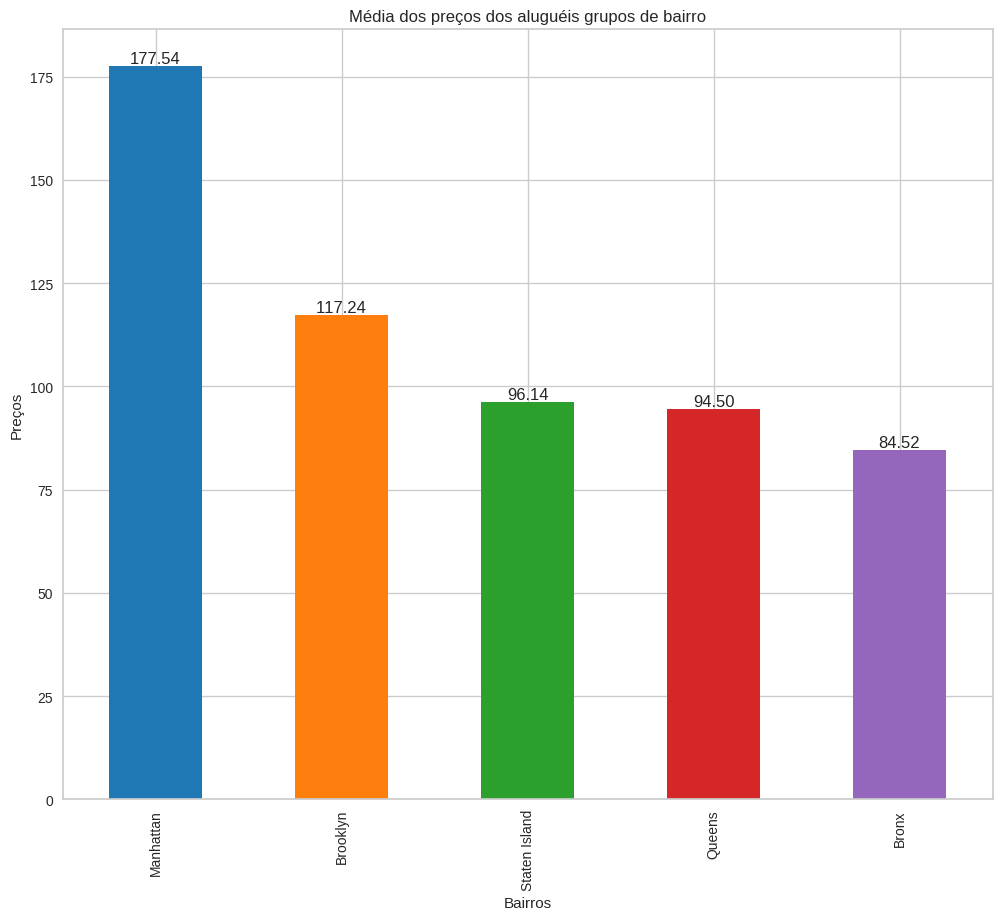

In [ ]:

media_bairro_caro = novo_data.groupby('bairro_grupo')['preco'].mean().sort_values(ascending=False)[:6]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(12, 10))

media_bairro_caro.plot(kind= 'bar', ax=ax, color= colors)
ax.set_xlabel('Bairros')
ax.set_ylabel('Preços')
ax.set_title('Média dos preços dos aluguéis grupos de bairro')

for i, (bairro, preco) in enumerate(media_bairro_caro.items()):
    ax.annotate(f'{preco:.2f}', (i, preco), ha='center', va='bottom', fontsize=12)


plt.show()

****

**O número mínimo de noites e a disponibilidade intereferem no preço?**


In [193]:
correlacao_noite_disponibilidade_preco = novo_data[['preco', 'minimo_noites', 'disponibilidade_365']].corr()

print(correlacao_noite_disponibilidade_preco)

                        preco  minimo_noites  disponibilidade_365
preco                1.000000       0.035409             0.117837
minimo_noites        0.035409       1.000000             0.219442
disponibilidade_365  0.117837       0.219442             1.000000


### gráfico de densidade

De acordo com o valores de correlação entre as variáveis, há uma baixa relação entre o número mínimo de noites e o preço do imóvel e entre a disponibilidade do imóvel e o preço.

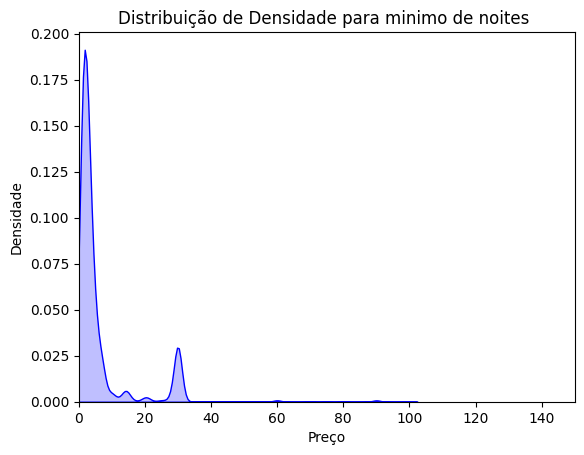

In [194]:
sns.kdeplot(novo_data['minimo_noites'], color='blue', fill=True)
plt.xlim(0, 150)

plt.title('Distribuição de Densidade para minimo de noites ')
plt.xlabel('Preço')
plt.ylabel('Densidade')

plt.show()


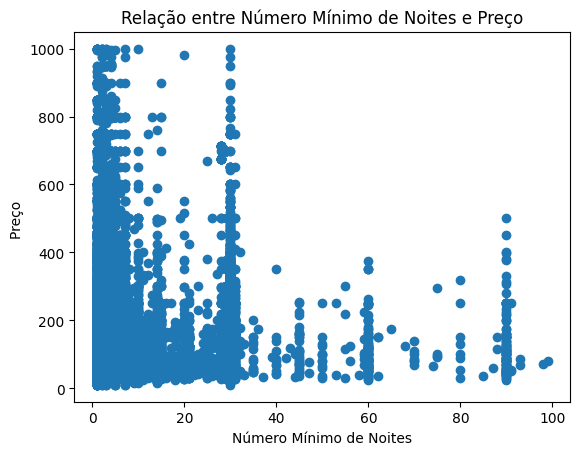

In [ ]:
# Visualização de dados mínimo de noites e preço
plt.scatter(novo_data['minimo_noites'], novo_data['preco'])
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço ')
plt.title('Relação entre Número Mínimo de Noites e Preço')
plt.show()

De acordo com o gráfico acima percebe-se  a relação entre a variável "preço" e a variável "minimo_noites", em que alguns aluguéis mais caros tem tempo mínimo de noites reduzido, já aluguéis mais baratos tem disponibilidade de tempo menor e alguns tem numero minimo de noites maior.

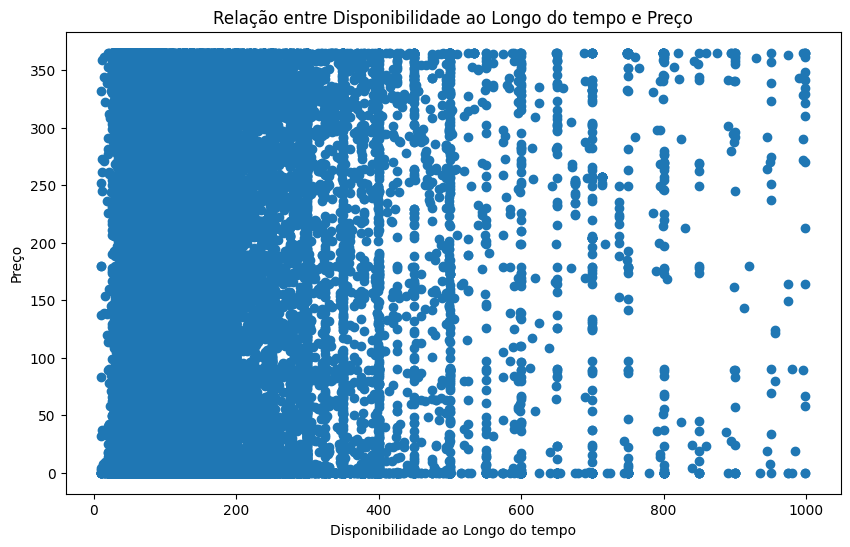

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(novo_data['preco'], novo_data['disponibilidade_365'])
plt.xlabel('Disponibilidade ao Longo do tempo')
plt.ylabel('Preço')
plt.title('Relação entre Disponibilidade ao Longo do tempo e Preço')
plt.show()

**Existe algum padrão no texto do nome do local para lugares de mais alto valor?**

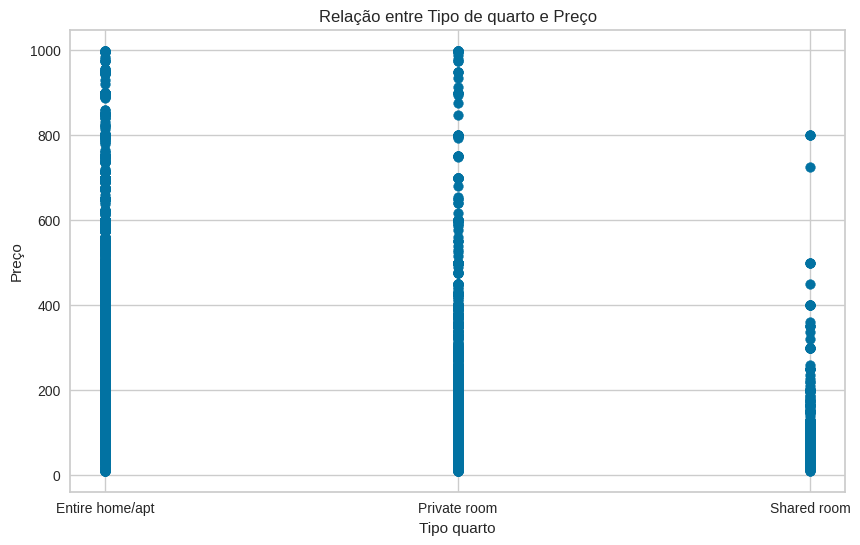

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(novo_data['tipo_quarto'], novo_data['preco'])
plt.xlabel('Tipo quarto')
plt.ylabel('Preço')
plt.title('Relação entre Tipo de quarto e Preço')
plt.show()




*   Em relação ao a variável tipo_quarto, os imóveis que são do tipo ENtire home/apt são mais caros do que imóveis do tipo shared room. Já private room tem valores parecidos com entire home/apt.

In [ ]:
palavras = data['nome'].str.split()

In [ ]:
palavras

0                                [Skylit, Midtown, Castle]
1               [THE, VILLAGE, OF, HARLEM....NEW, YORK, !]
2                    [Cozy, Entire, Floor, of, Brownstone]
3        [Entire, Apt:, Spacious, Studio/Loft, by, cent...
4        [Large, Cozy, 1, BR, Apartment, In, Midtown, E...
                               ...                        
48889    [Charming, one, bedroom, -, newly, renovated, ...
48890    [Affordable, room, in, Bushwick/East, Williams...
48891        [Sunny, Studio, at, Historical, Neighborhood]
48892          [43rd, St., Time, Square-cozy, single, bed]
48893    [Trendy, duplex, in, the, very, heart, of, Hel...
Name: nome, Length: 48867, dtype: object

In [ ]:
num_palavras_unicas = palavras.explode().nunique()
num_palavras_unicas

21963

In [ ]:
contagem_palavras = palavras.explode().value_counts()
contagem_palavras

in             15802
Private         4975
Room            4813
room            4164
Bedroom         4125
               ...  
COLOR,             1
LIGHT!!!           1
COOK'S             1
KITCHEN!!!         1
Square-cozy        1
Name: nome, Length: 21963, dtype: int64

In [ ]:
data_hotel = data[data['nome'].str.contains('bridge', case=False)]

print(data_hotel)

                                                    nome bairro_grupo  \
816                  Between Two Bridges 2BD -Whole Apt!    Manhattan   
1157                  Two Bridges District Chinatown NYC    Manhattan   
4344                    NearWilliamsburg bridge 11211 BK     Brooklyn   
7234   Upper West SIDE,Washington bridge,Time Square 30'    Manhattan   
8815      GIANT LOFT IN DUMBO -- BY BROOKLYN BRIDGE PARK     Brooklyn   
...                                                  ...          ...   
45873              Charming apartment next to the bridge     Brooklyn   
46074  ⋆ Luxury FiDi Terrace Apt w/ Brooklyn Bridge v...    Manhattan   
46915       Artist apartment in the heart of two bridges    Manhattan   
47222  Bed in a shared dormitory next to Brooklyn bridge     Brooklyn   
48288  ✰ Manhattan Bridge ✰ STUDIO / w. Private Backyard    Manhattan   

                   bairro  latitude  longitude      tipo_quarto  preco  \
816             Chinatown  40.71283  -73.99703  E

*   Neste exemplo, feito de forma simples, filtrando os lugares que contenham a palavra 'brigde' há somente uma ocorrência em que o aluguel é acima de 4000 dólares, já as outras ocorrências são abaixo de 300 dólares.




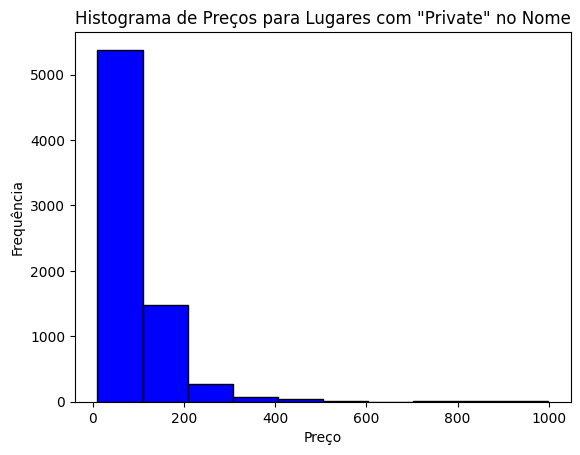

In [ ]:
data_private = novo_data[novo_data['nome'].str.contains('private', case=False)]

# Criar o histograma
plt.hist(data_private['preco'], bins=10, color='blue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title('Histograma de Preços para Lugares com "Private" no Nome')
plt.xlabel('Preço')
plt.ylabel('Frequência')

# Exibir o histograma
plt.show()

## Codificação de variáveis categóricas:


In [ ]:
novo_data.select_dtypes(include='object').describe()

,nome,bairro_grupo,bairro,tipo_quarto
count,48392,48392,48392,48392
unique,47428,5,221,3
top,Hillside Hotel,Manhattan,Williamsburg,Entire home/apt
freq,18,21326,3890,25038


## Tratamento de Atributos Categóricos

### one hot encoder


In [195]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [196]:
# criar uma instância one hot encoder
one_hot_encoder = OneHotEncoder()

# ajustar e transformar os dados
data_codificado = one_hot_encoder.fit_transform(novo_data[['tipo_quarto']])

# converter a saída para dataframe
data_codificado_novo_DF = pd.DataFrame(data_codificado.toarray(), columns=one_hot_encoder.get_feature_names_out(['tipo_quarto']))

#concatenar
data_final = pd.concat([novo_data, data_codificado_novo_DF], axis=1)

In [234]:
 data_final.drop(['tipo_quarto'], axis=1, inplace=True)

KeyError: "['tipo_quarto'] not found in axis"

In [198]:
data_final.head()

,nome,bairro_grupo,bairro,latitude,longitude,preco,minimo_noites,numero_avaliacoes,contagem_listas_hosts,disponibilidade_365,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,225.0,1.0,45.0,2.0,355.0,1.0,0.0,0.0
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,150.0,3.0,0.0,1.0,365.0,0.0,1.0,0.0
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,89.0,1.0,270.0,1.0,194.0,1.0,0.0,0.0
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,80.0,10.0,9.0,1.0,0.0,1.0,0.0,0.0
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,200.0,3.0,74.0,1.0,129.0,1.0,0.0,0.0


In [199]:
data_final = data_final.dropna(subset=['preco'])
data_final = data_final.dropna(subset=['tipo_quarto_Entire home/apt', 'tipo_quarto_Private room', 'tipo_quarto_Shared room'])
linhas_preco_faltante = data_final[data_final['preco'].isnull()]

print("Linhas onde o preço é faltante:")
print(linhas_preco_faltante)

valores_ausentes2 = data_final.isnull().sum()
valores_ausentes2

Linhas onde o preço é faltante:
Empty DataFrame
Columns: [nome, bairro_grupo, bairro, latitude, longitude, preco, minimo_noites, numero_avaliacoes, contagem_listas_hosts, disponibilidade_365, tipo_quarto_Entire home/apt, tipo_quarto_Private room, tipo_quarto_Shared room]
Index: []


nome                           0
bairro_grupo                   0
bairro                         0
latitude                       0
longitude                      0
preco                          0
minimo_noites                  0
numero_avaliacoes              0
contagem_listas_hosts          0
disponibilidade_365            0
tipo_quarto_Entire home/apt    0
tipo_quarto_Private room       0
tipo_quarto_Shared room        0
dtype: int64

In [200]:
data_final.head()

,nome,bairro_grupo,bairro,latitude,longitude,preco,minimo_noites,numero_avaliacoes,contagem_listas_hosts,disponibilidade_365,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,225.0,1.0,45.0,2.0,355.0,1.0,0.0,0.0
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,150.0,3.0,0.0,1.0,365.0,0.0,1.0,0.0
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,89.0,1.0,270.0,1.0,194.0,1.0,0.0,0.0
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,80.0,10.0,9.0,1.0,0.0,1.0,0.0,0.0
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,200.0,3.0,74.0,1.0,129.0,1.0,0.0,0.0


## Divisão de previsores e classe

In [201]:
data_final.columns

Index(['nome', 'bairro_grupo', 'bairro', 'latitude', 'longitude', 'preco',
       'minimo_noites', 'numero_avaliacoes', 'contagem_listas_hosts',
       'disponibilidade_365', 'tipo_quarto_Entire home/apt',
       'tipo_quarto_Private room', 'tipo_quarto_Shared room'],
      dtype='object')

In [202]:
nova_ordem_colunas = ['bairro_grupo', 'bairro', 'latitude', 'longitude',
                      'minimo_noites', 'numero_avaliacoes',
                      'contagem_listas_hosts',
                      'disponibilidade_365', 'tipo_quarto_Entire home/apt',
                      'tipo_quarto_Private room', 'tipo_quarto_Shared room', 'preco']

data_final = data_final[nova_ordem_colunas]

In [203]:
data_final.columns

Index(['bairro_grupo', 'bairro', 'latitude', 'longitude', 'minimo_noites',
       'numero_avaliacoes', 'contagem_listas_hosts', 'disponibilidade_365',
       'tipo_quarto_Entire home/apt', 'tipo_quarto_Private room',
       'tipo_quarto_Shared room', 'preco'],
      dtype='object')

In [204]:
data_final.head()

,bairro_grupo,bairro,latitude,longitude,minimo_noites,numero_avaliacoes,contagem_listas_hosts,disponibilidade_365,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room,preco
0,Manhattan,Midtown,40.75362,-73.98377,1.0,45.0,2.0,355.0,1.0,0.0,0.0,225.0
1,Manhattan,Harlem,40.80902,-73.94190,3.0,0.0,1.0,365.0,0.0,1.0,0.0,150.0
2,Brooklyn,Clinton Hill,40.68514,-73.95976,1.0,270.0,1.0,194.0,1.0,0.0,0.0,89.0
3,Manhattan,East Harlem,40.79851,-73.94399,10.0,9.0,1.0,0.0,1.0,0.0,0.0,80.0
4,Manhattan,Murray Hill,40.74767,-73.97500,3.0,74.0,1.0,129.0,1.0,0.0,0.0,200.0


In [232]:
X = data_final.iloc[:, 0:11].values
X[0]


array(['Manhattan', 'Midtown', 40.75362, -73.98377, 1.0, 45.0, 2.0, 355.0,
       1.0, 0.0, 0.0], dtype=object)

In [235]:
y = data_final.iloc[:,11].values
y

array([225., 150.,  89., ..., 150., 170., 138.])

### label encoder

In [237]:
from sklearn.preprocessing import LabelEncoder

In [238]:
label_encoder_bairro_grupo = LabelEncoder()
label_encoder_bairro = LabelEncoder()

In [239]:
X[:,0]

array(['Manhattan', 'Manhattan', 'Brooklyn', ..., 'Brooklyn', 'Brooklyn',
       'Manhattan'], dtype=object)

In [240]:
X[:,1]

array(['Midtown', 'Harlem', 'Clinton Hill', ..., 'Bedford-Stuyvesant',
       'Williamsburg', 'Harlem'], dtype=object)

In [241]:
X[:,0] = label_encoder_bairro_grupo.fit_transform(X[:,0])
X[:,1] = label_encoder_bairro.fit_transform(X[:,1])

In [242]:
X[:,0]

array([2, 2, 1, ..., 1, 1, 2], dtype=object)

In [243]:
X[:,1]

array([127, 94, 41, ..., 13, 214, 94], dtype=object)

## Escalonamento de atributos

In [244]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X = scaler_census.fit_transform(X)

In [245]:
X

array([[ 0.44344106,  0.29040886,  0.45300345, ...,  0.96517293,
        -0.92044821, -0.15558987],
       [ 0.44344106, -0.18968147,  1.46903821, ..., -1.03608376,
         1.08642724, -0.15558987],
       [-0.91490384, -0.96073565, -0.80291823, ...,  0.96517293,
        -0.92044821, -0.15558987],
       ...,
       [-0.91490384, -1.36808503, -0.81227162, ...,  0.96517293,
        -0.92044821, -0.15558987],
       [-0.91490384,  1.55610157, -0.30443763, ..., -1.03608376,
        -0.92044821,  6.42715364],
       [ 0.44344106, -0.18968147,  1.42428867, ..., -1.03608376,
         1.08642724, -0.15558987]])

In [246]:
y

array([225., 150.,  89., ..., 150., 170., 138.])

## Separação em dados de teste e treinamento

In [247]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size = 0.20,random_state = 1)


In [248]:
X.shape

(47893, 11)

In [249]:
y.shape

(47893,)

In [250]:
X_treinamento.shape,y_treinamento.shape


((38314, 11), (38314,))

In [251]:
X_teste.shape,y_teste.shape

((9579, 11), (9579,))

## Salvar variáveis

In [ ]:
import pickle

In [ ]:
with open('precificacao_aluguel.pkl',mode='wb')as f:
  pickle.dump([X_treinamento,y_treinamento,X_teste,y_teste],f)

#linear regression

In [261]:
acuracia_dos_modelos = pd.DataFrame(columns=['Modelo','Erro médio quadrático (MSE)','Raiz do erro médio quadrático (RMSE)', 'Erro médio absoluto (MAE)'])

In [259]:
lin_reg = LinearRegression()
lin_reg.fit(X_treinamento, y_treinamento)

y_pred = lin_reg.predict(X_teste)

In [253]:
y_pred

array([119.90472423, 145.13416851, 132.43468463, ..., 173.92877781,
       123.87531303,  88.26368147])

In [262]:
dado_entrada = scaler.transform(X.values[5].reshape(1, -1))
previsao = lin_reg.predict(dado_entrada)
previsao

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [255]:
X.shape

(47893, 11)

In [263]:
lin_mae = mean_absolute_error(y_teste, y_pred)
lin_mse = mean_squared_error(y_teste, y_pred)
lin_rmse = np.sqrt(lin_mse)


acuracia_lin_reg = pd.DataFrame([{'Modelo': 'Linear Regression', 'Erro médio quadrático (MSE)': lin_mse, 'Raiz do erro médio quadrático (RMSE)': lin_rmse, 'Erro médio absoluto (MAE)': lin_mae}])

acuracia_dos_modelos = pd.concat([acuracia_dos_modelos, acuracia_lin_reg], ignore_index=True)
acuracia_dos_modelos

,Modelo,Erro médio quadrático (MSE),Raiz do erro médio quadrático (RMSE),Erro médio absoluto (MAE)
0,Linear Regression,11598.380895,107.695779,70.15639


#DecisionTreeRegressor¶


In [265]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_treinamento, y_treinamento)

y_pred = tree_reg.predict(X_teste)

In [267]:
dado_entrada = scaler.transform(X.values[6].reshape(1,-1))
previsao = tree_reg.predict(dado_entrada)
previsao

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [268]:
tree_reg_mae = mean_absolute_error(y_teste, y_pred)
tree_reg_mse = mean_squared_error(y_teste, y_pred)
tree_reg_rmse = np.sqrt(tree_reg_mse)


acuracia_tree_reg = pd.DataFrame([{'Modelo': 'Decision Tree Regressor', 'Erro médio quadrático (MSE)': tree_reg_mse, 'Raiz do erro médio quadrático (RMSE)': tree_reg_rmse, 'Erro médio absoluto (MAE)': tree_reg_mae}])

acuracia_dos_modelos = pd.concat([acuracia_dos_modelos, acuracia_tree_reg], ignore_index=True)
acuracia_dos_modelos

,Modelo,Erro médio quadrático (MSE),Raiz do erro médio quadrático (RMSE),Erro médio absoluto (MAE)
0,Linear Regression,11598.380895,107.695779,70.156390
1,Decision Tree Regressor,18043.603716,134.326482,80.091032


#RandomForestRegression

In [269]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_treinamento, y_treinamento)

y_pred = forest_reg.predict(X_teste)

In [ ]:
dado_entrada = scaler.transform(features.values[200].reshape(1, -1))
previsao = forest_reg.predict(dado_entrada)
previsao

In [270]:
forest_reg_mae = mean_absolute_error(y_teste, y_pred)
forest_reg_mse = mean_squared_error(y_teste, y_pred)
forest_reg_rmse = np.sqrt(forest_reg_mse)


acuracia_forest_reg = pd.DataFrame([{'Modelo': 'Random Forest Regression', 'Erro médio quadrático (MSE)': forest_reg_mse, 'Raiz do erro médio quadrático (RMSE)': forest_reg_rmse, 'Erro médio absoluto (MAE)': forest_reg_mae}])

acuracia_dos_modelos = pd.concat([acuracia_dos_modelos, acuracia_forest_reg], ignore_index=True)
acuracia_dos_modelos

,Modelo,Erro médio quadrático (MSE),Raiz do erro médio quadrático (RMSE),Erro médio absoluto (MAE)
0,Linear Regression,11598.380895,107.695779,70.156390
1,Decision Tree Regressor,18043.603716,134.326482,80.091032
2,Random Forest Regression,9147.901926,95.644665,60.141275


#Support VEctor Regression (SVR)¶


In [271]:
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_treinamento, y_treinamento)

y_pred = svm_reg.predict(X_teste)

In [273]:
svm_reg_mae = mean_absolute_error(y_teste, y_pred)
svm_reg_mse = mean_squared_error(y_teste, y_pred)
svm_reg_rmse = np.sqrt(forest_reg_mse)


acuracia_svm_reg = pd.DataFrame([{'Modelo': 'Support Vector Regression (SVR)', 'Erro médio quadrático (MSE)': svm_reg_mse, 'Raiz do erro médio quadrático (RMSE)': svm_reg_rmse, 'Erro médio absoluto (MAE)': svm_reg_mae}])

acuracia_dos_modelos = pd.concat([acuracia_dos_modelos, acuracia_svm_reg], ignore_index=True)
acuracia_dos_modelos

,Modelo,Erro médio quadrático (MSE),Raiz do erro médio quadrático (RMSE),Erro médio absoluto (MAE)
0,Linear Regression,11598.380895,107.695779,70.156390
1,Decision Tree Regressor,18043.603716,134.326482,80.091032
2,Random Forest Regression,9147.901926,95.644665,60.141275
3,Support Vector Regression (SVR),12498.854101,95.644665,66.584538


#Evaluation

In [274]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # Tente 12 (3×4) combinações de hiperparâmetros
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},# então tente 6 (2×3) combinações com o bootstrap definido como False
]

forest_reg = RandomForestRegressor(random_state=42)

# treine em 5 dobras, totalizando (12+6)*5=90 rodadas de treinamento
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)
grid_search.fit(X_treinamento, y_treinamento)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [275]:
grid_search.best_params_


{'max_features': 4, 'n_estimators': 30}

In [276]:
grid_search.best_estimator_


RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [278]:
forest_reg = RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)
forest_reg.fit(X_treinamento, y_treinamento)

y_pred = forest_reg.predict(X_teste)

In [279]:
forest_reg_mae = mean_absolute_error(y_teste, y_pred)
forest_reg_mse = mean_squared_error(y_teste, y_pred)
forest_reg_rmse = np.sqrt(forest_reg_mse)


acuracia_forest_reg = pd.DataFrame([{'Modelo': 'Random Forest Regression (aprimorado)', 'Erro médio quadrático (MSE)': forest_reg_mse, 'Raiz do erro médio quadrático (RMSE)': forest_reg_rmse, 'Erro médio absoluto (MAE)': forest_reg_mae}])

acuracia_dos_modelos = pd.concat([acuracia_dos_modelos, acuracia_forest_reg], ignore_index=True)
acuracia_dos_modelos

,Modelo,Erro médio quadrático (MSE),Raiz do erro médio quadrático (RMSE),Erro médio absoluto (MAE)
0,Linear Regression,11598.380895,107.695779,70.156390
1,Decision Tree Regressor,18043.603716,134.326482,80.091032
2,Random Forest Regression,9147.901926,95.644665,60.141275
3,Support Vector Regression (SVR),12498.854101,95.644665,66.584538
4,Random Forest Regression (aprimorado),9163.108857,95.724129,60.186429


Random forest regression - modelo escolhido

#validação cruzada

In [285]:
dt_regressor = DecisionTreeRegressor()
rf_regressor = RandomForestRegressor()


In [282]:
k_folds = 5

In [283]:
dt_scores = cross_val_score(dt_regressor, X_treinamento, y_treinamento, cv = k_folds, scoring='neg_mean_squared_error')
dt_mse_mean = -dt_scores.mean()
dt_mse_std = dt_scores.std()

In [284]:
print("Decision Tree Regressor - MSE (mean ± std): {:.2f} ± {:.2f}".format(dt_mse_mean, dt_mse_std))


Decision Tree Regressor - MSE (mean ± std): 17272.56 ± 138.44


In [286]:
# Realizar a validação cruzada para o Random Forest Regressor
rf_scores = cross_val_score(rf_regressor, X_treinamento, y_treinamento, cv=k_folds, scoring='neg_mean_squared_error')
rf_mse_mean = -rf_scores.mean()
rf_mse_std = rf_scores.std()


In [287]:
print("Random Forest Regression - MSE (mean ± std): {:.2f} ± {:.2f}".format(rf_mse_mean, rf_mse_std))


Random Forest Regression - MSE (mean ± std): 8828.96 ± 365.48
